##### Data Camp - Unsupervised Learning in Python

SUPERVISED learning finds patterns for a prediction task
    - ex: classifying tumors as benign or cancerous (assigning labels)

UNSUPERVISED learning findf patternsd in data
    - without a specific predidction task in mind

K-Means clustering
    - finds clusters of samples
    - number of clusers must be specifice
    
        from sklearn.cluster import KMeans
        # create model, specify nubmer of clusters
        model = KMeans(n_clusters=3)
        # call fit, pass array of samples
        #locates and remembers regions where clusters occue
        model.fit(samples)
        
        #returns cluster label for each row
        labels = model.predict(samples)
        
    - new samples can be assigned to existing clusters
    - k-means remembers the mean of each cluster (the centroids)
    - finds the nearest centroid to each new sample
        
        #pass new samples to model and produce labels
        print(new_samples)
        new_labels = model.predict(new_samples)
        print(new)labels)
        
Scatter Plots
- scatter plot of sepal length vs. petal length
- each point represents an iris sample
- color points by cluster labels
        
        import matplotlib.pyplot as plt
        # x and y coordinates of each sample, 0 indexing for column location
        xs = samples[:,0]
        ys = samples[:,2]
        # pass x and y, color by labels
        plt.scatter(xs,ys, c=labels)

In [ ]:
## Clustering 2D points
# Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
# Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
# Make a scatter plot by passing xs and ys to the plt.scatter() function.
# Call the plt.show() function to show your plot.

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

In [ ]:
## Inspecting your clustering

# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

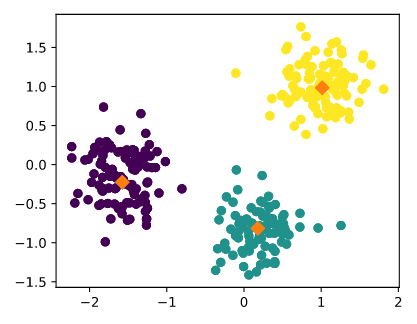

###### Evaluating a clustering

- could check correspondence with existing iris species, but this option is not always available
- measure quality of clustering
    - informs choice of how many clusters to look for
    
Iris: clusters vs. species
- K-means found 3 clusters amoungst iris samples
- do the clusters correspond to the species?

Create cross-tabulation with pandas
        import pandas as pd
        # dictionary of lists
        df = DataFrame({'labels':labels, 'species':species})
        
        ct = pd.crosstab(df['labe;s'], df['species'])
        print(ct)
        
- what to do when there is no species information to associate with the cluster?

Measuring clustering quality?
- uses only the smaples and their cluster labels
- good clustering has tight clusters

Inertia 
- measures how spread out the clusters are (lower is better)
- measure of the distance from each sample to centroid (center of cluster)
- after fit, available as inertia_
- K-means places clusters in a way that minimizes inertia
        from sklearn.cluster import KMeans
        model = KMeans(n_clusters=3)
        model.fit(samples)
        print(model.inertia_)
        
The number of clusters
- generally inertia continually declines as cluster number increases, where to end it?
- trade off, find the elbow in the inertia plot where inertia begins to decrease more slowly

In [ ]:
## How many clusters of grain?

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# The inertia decreases very slowly from 3 clusters to 4, 
# so it looks like 3 clusters would be a good choice for this data.

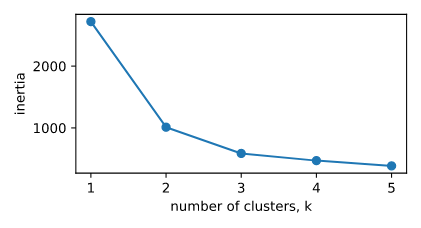

In [ ]:
## Evaluating the grain clustering

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

OUTPUT:
varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                      68           9           0
2                       2          60          10

###### Transforming features for better clusterings

    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=3)
    labels = model.fit_predict(samples)
    
    df = pd.DataFrame({'labels':labels, 'varieties':varieties})
    ct = pd.crosstab(df['labels'], df['varieties'])
    
StandardScaler
- for the wine dataset, there is high feature variance so the clustering is ineffective
- feature variance = feature influence
- standard scaler transforms each features to mane mean 0 and variance 1
        
        from sklearn import StandardScaler
        scaler = StandardScaler()
        scaler.fit(samples)
        StandardScaler(copy=True, with_mean=True, with_std=True)
        samples_scaled = scaler.transform(samples)
        
API of StandardScaler and KMeans
- Standard Scaler uses fit and transform
- KMeans uses fit and predict

Pipeline to combine two steps

        from sklearn.preprocessing import StandardScaler
        from sklearn.cluster import KMeans
        scaler = StandardScaler()
        kmeans = KMeans(n_clusters=3)
        
        from sklearn.pipeline import make_pipeline
        pipeline = make_pipeline(scaler, kmeans)
        pipeline.fit(samples)
        labels = pipeline.predict(samples)
        
SantardScaler is preprocessing step
- others: MaxAbsScaler and Normalizer

In [ ]:
## Scaling fish data for clustering

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [1]:
## Clustering the fish data

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

OUTPUT:
    species  Bream  Pike  Roach  Smelt
    labels                            
    0            0     0      0     13
    1           33     0      1      0
    2            0    17      0      0
    3            1     0     19      1

In [ ]:
## Clustering stocks using KMeans
## StandardScaler() standardizes features by removing the mean and scaling to unit variance
## Normalizer() rescales each sample independently of the other.

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

In [ ]:
## Which stocks move together

# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

## CHAPTER 2 - VISUALIZING HIERARCHIES

- visualizations communicate insight
    - heirarchical clustering
    - t-SNE - creates a 2D map of a dataset

Heirarchical clustering
- ex: groups of living things, can be broad or narrow groups contained within each other
- arranges a heirarchy of clusters
- steps for AGGLOMERATIVE CLUSTERING:
    - each country begins in a seperate cluster
    - at each step, the two closest clusters are merged
    - continue until all countries are in a single cluster
    - contrast to DIVISIVE CLUSTERING (works opposite)
    - produce dendrogram, read from bottom up
            
            samples = array of scores
            country_names = list of country names
            
            import matplotlib.pyplit as ply
            from scipy.cluster.heirarchy import linkage, dendrogram
            mergings = linkage(samples, method='complete')
            dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
            plt.show()

In [ ]:
## Heirarchical clustering of the grain data

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


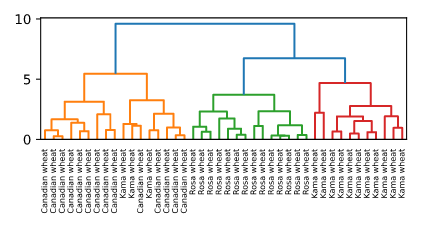

In [ ]:
## Hierarchies of stocks
## SciPy hierarchical clustering doesn't fit into a sklearn pipeline, 
## so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

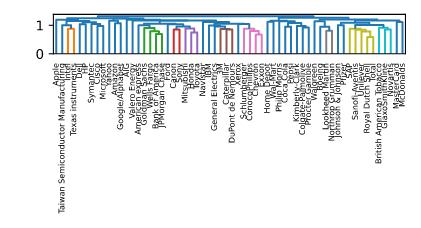

###### Clustering labels in hierarchical clustering

cluster labels at any intermediate stage can be recovered
used for cross tabulation

-fcluster = flat hierarchical clustering
- choose by heights
- heights on dendrograms = distance between merging clusters
- height on dendrogram specifies max distance between merging clusters
- defined by linkage method
    - in 'complete' linkage - distance between clusters is max distance between samples
    - specified via method parameter
    - different linkage method, different hierarchical clustering
            
            from scipy.cluster.hierarchy import linkage
            mergings = linkage(samples, method='complete')
            from scipy.cluster.hierarchy import fcluster
            label = fcluster(mergings, 15, criterion='distance')
            print(labels)
            
            import pandas as pd
            pairs =pd.DataFrame({'labels':labels, 'countries':country_name})
            print(pairs.sort_values('labels'))
            
            # notice that scipy cluster labels start at 1, not 0 as in sklearn

In [ ]:
## Different linkage creates different hierarchical clustering

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()


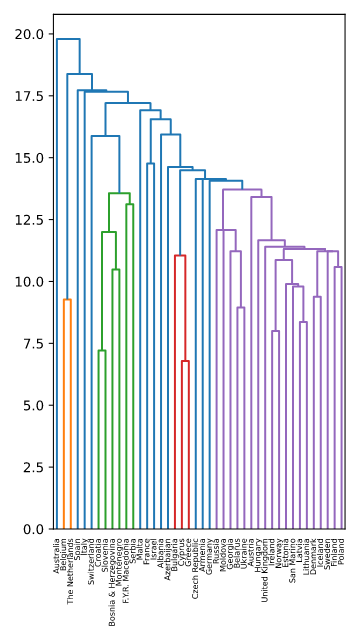

In [ ]:
## Extracting cluster labels

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

###### t-SNE for 2-D mapping

t-SNE = t-distributed stochastic neighbor embedding
- map samples from higher-dimensional space to 2D (or 3D) space
- map approximately preserves nearness of samples
- great for inspecting datasets
        
        imort matplotlib.pyplot as plt
        from sklearn.manifold import TSNE
        #learning rate, try a few values between 50 and 200
        model = TSNE(learning_rate=100)
        #samples are in a 2D array
        #can only use .fit_transform on TSNE (cannot add new samples later)
        transformed = model.fit_transform(samples)
        xs = transformed[:,0]
        ys = transformed[:,1]
        #species is a list of species labels for each sample
        plt.scatter(xs,ys, c=species)
        plt.show()
        #axes do not have an interpretable meaning, different each time
        

In [ ]:
## TSNE Visualization of grain dataset

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


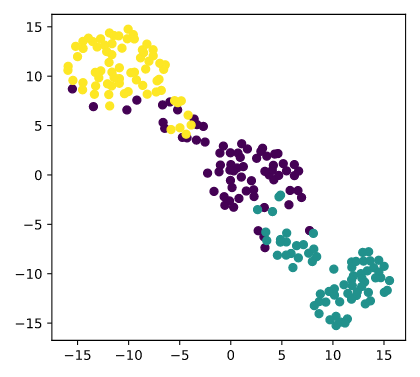

In [ ]:
## A t-SNE map of the stock market
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

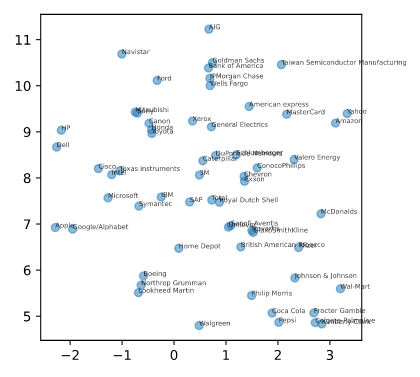

## CHAPTER 3 - Decorrelating data and dimension redction

###### Visualizing the PCA transformation

Dimension reduction
- more efficient storage and computation
- remove less informative noise features which cause problems for prediction tasks

Principal Component Analysis (PCA)
- fundamental dimension reduction technique
- first step is 'decorrelation', scond step is dimension reduction
    - rotate data samples to be aligned with axes
    - shifts data samples to have mean = 0
    - create PCA features that are not correlated        
            from sklearn.decomposition import PCA
            model=PCA()
            #rows correspond to rows in samples
            #columns are transformed into PCA features
            transformed_samples = model.fit(samples)
            #principal components are available after fitting
            model.components_

- principal components = direction of variance
PCA aligns principal components with the axes
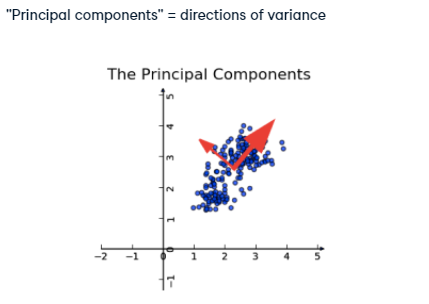


In [ ]:
## Correlated Data in Nature
## You suspect that width and length will be correlated. 
## To confirm this, make a scatter plot of width vs length 
## and measure their Pearson correlation.

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

OUTPUT:
    0.8604149377143466 (highly correlated)

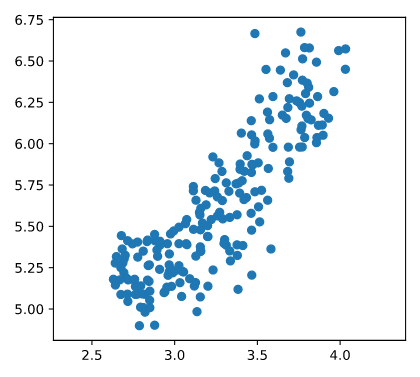

In [ ]:
## Decorrelating the grain measurements with PCA

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

OUTPUT:
    2.5478751053409354e-17

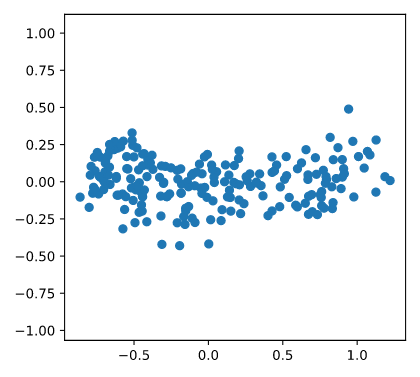

###### Intrinsic Dimension

EX: latitude and longitude (2D dataset), but it can be closely tracked as the displacement along a flight path (making it intrinsicly 1 dimensional)

Intrinsic dimension = the number of features needed to approximate the dataset
- essential idea behing dimension reduction
- what is the most compact representation of the samples
- intrinsic dimensions detected by PCA

Ex: Iris dataset
- when visualizing in 3D we see that they seem to lie flat, so this can be approximated with 2 features
- PCA can identify the number of intrinsic features without the use of visualizing

intrinsic dimension is the number of PCA features with significant variance (in this case, 2)
        
        import matplotlib.pyplot as plt
        from sklearn.decomposition import PCA
        pca = PCA()
        pca.fit(samples)
        
        #create a range enumerating the PCA features
        features = range(pca.n_components_)
        
        #create bar plot of variance
        plt.bar(features, pca.explained_variance_)
        plt.xticks(features)
        plt.ylabel('variance')
        plt.xlabel('PCA features')
        plt.show()
        
Intrinsic dimension can be ambiguous, there is not always a correct answer

In [ ]:
## The first Principal Component
## The first PC of the data is the direction in which the data varies the most.

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = model=PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

shows the direction in which the grain data varies the most
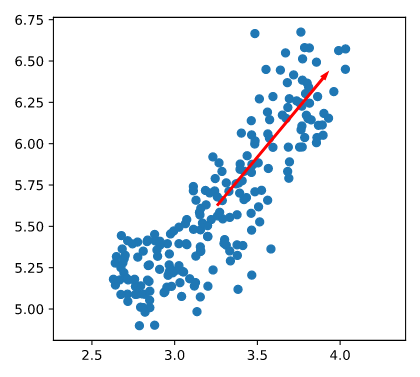

In [ ]:
## Variance of the PCA features
## standardize first

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


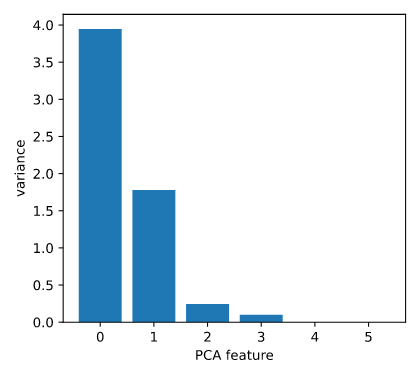

###### Dimension reduction with PCA

Dimension reduction 
- represents some data using fewer features
- important part of machine learning pipelines
- can be performed using PCA

Dimension reduction with PCA
- PCA features are in decreasing order of variance
- assumes low variance features are noise
- retains high variance features which are informative
- need to specify how many dimensions to keep PCA(n_components=x)
    - intrinsic dimension is a good choice if you know it

            from sklearn.decomposition import PCA
            pca = PCA(n_components=2)
            pca.fit(samples)
            transformed = pca.transform(samples)
            print(transformed.shape)
            (150, 2) # 2 features
            
            #plot transformed features
            import matplotlib.pyplot as plt
            xs = transformed[:,0]
            ys = transformed[:,1]
            plt.scatter(xs, ys, c=species)
            plt.show()

In some cases, alternative version of dimesnion reduction needs to be used
- EX: word frequency array contains many zeros (also called Sparse); often saved as csr_matrix
    - can use scipt.sparse.csr_matrix instead of Nunpy array
    - csr_matrix remembers only the non-zero entries to save space
    - sklearn PCA does not support csr_matrices
    - must used Truncated SVD instead
        
            from sklearn.decomposition import TruncatedSVD
            model = TruncatedSVD(n_components=3)
            model.fit(documents)
            transformed = model.transform(documents)

In [ ]:
## Dimension reduction of the fish measurements

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

In [ ]:
## A tf-idf word-frequency array
## use the TfidfVectorizer from sklearn. 
##It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

OUTPUT:
    
[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

In [ ]:
## Clustering Wikipedia articles 

# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


## given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, 
## and a list of their titles (as titles). Use your pipeline to cluster the Wikipedia articles.

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

## Chapter 4 Discovering Interpretable features

###### Non-negative matrix factorization (NMF)

NMF is a dimension reduction technique
- models are interpretable (unlike PCA)
- all sample features must be non-negative
- decomposes samples as sums of their parts
- fit and transform both available
- must specify number of components
- works with Np arrays and Sparse arrays

Ex: word frequency array with frequency of 4 words in many documents
- measure the frequency with tf-idf
- tf = frequency of word in a document 0.1 = 10% of words
- idf = weighting scheme that reduces the influence of words like 'the'

        from sklearn.decomposition import NMF
        model = NMF(n_components=2)
        model.fit(samples)
        nmf_features = model.transform(samples)
        
NMF has components and feature values like PCA

        #entries are always non-negative
        print(model_components_)
       
        #feature values are always non-negative
        #can be used to reconstruct samples
        print(nmf_features)
        
reconstruction of sample
- multiple NMF components by NMF feature values and sum
- can also be expressed as a product of matrices (where matrix factorization in name comes from)
Other uses (anything with non-negative values)
    - word frequencies, images encoded as arrays, audio spectrograms., purchase histories, etc.

In [ ]:
## NMF applied to Wikipedia articles
## apply NMF using the tf-idf word-frequency array of Wikipedia articles, csr matrix (articles)

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

## When investigating the features, notice that for both actors, 
## the NMF feature 3 has by far the highest value. 
## This means that both articles are reconstructed using mainly the 3rd NMF component.

# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

OUTPUT:
0    0.003845
1    0.000000
2    0.000000
3    0.575711
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422380
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64

###### NMF learns interpretable parts

Components of NMF represent patterns that frequently occur in sample
Ex: 20,000 scientific articles and frequency of 800 words 

        from sklearn.decomposition import NMF
        nmf = NMF(n_components=10)
        nmf.fit(articles)
        print(nmf.components_.shape)

For documents - 
- NMF components represents topics
- NMF features combine topics into documents

For images - 
- NMF components represent patterns
- next example

Greyscale image has no colors only shade of grey from black to white
- encoded by brightness of pizel
    - 0 is black and 1 is white
- can flatten the array and view collections of images as a 2D array
    - each row corresponds to an image and each column to a pixel
    - array is very similar to document array
- recover the image to reshape as the original shape
            
            print(sample)
            [0. 1. 0.5 1. 0. 1.]
            bitmap = sample.reshape((2,3))
            print(bitmap)
            [[0. 1. 1.5]
             [1. 0. 1. ]]
             
            import matplotlib.pyplot as plt
            plt.imshow(bitmap, cmap='gray', interpolation='nearest')
            plt.show()

In [ ]:
## NMF learns topics of documents

# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

OUTPUT
(6, 13125)
film       0.627877
award      0.253131
starred    0.245284
role       0.211451
actress    0.186398
Name: 3, dtype: float64

In [ ]:
## Explore LED digits dataset

# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

OUTPUT:
    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
     0. 0. 0. 0. 0. 0. 0. 0.]

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13,8))

# Print bitmap
print(bitmap)

OUTPUT:
    [[0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 1. 1. 1. 1. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]]

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

OUTPUT:

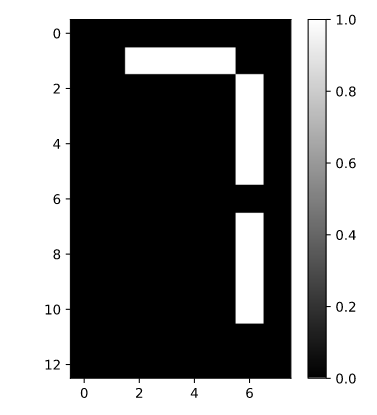

In [ ]:
## NMF learns the parts of images
## given function 
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
    
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

In [ ]:
## PCA doesn't learn component parts
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

###### Building recommender systems using NMF

- apply NMF to the word-frequency array
- NMF feature values describe similar topics
- find similar articles with similar feature values

        from sklearn.decomposition import NMF
        nmf = NMF(n_components=6)
        nmf_features = nmf.fit_transform(articles)

compare NMF features
- some articles have extraneous words that don't contribute to the topic
- all versions like on the same line through the origin

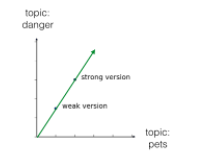

Cosine similarity
- us the angles between lines 
- higher values mean more similar, max value is 1 when angle is 0
        
        from sklearn.preprocessing import normalize
        norm_features = normalize(nmf_features)
        #select row corresponding to current article
        current_article = norm_features[23,:]
        similarities = norm_features.dot(current_article)
        #produces cosine similarities
        
        #label similarities with article titles
        import pandas as pd
        norm_features = normalize(nmf_features)
        df = pd.DataFrame(norm_features, index=titles)
        current_article = df.loc['Dog bites man']
        similarities = norm_features.dot(current_article)
        print(similarities.nlargest())

In [ ]:
## Finding Similar Articles

# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

In [ ]:
## Recommended Musical Artists

# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())